In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('heart_failure_records.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Do not Execute/Run This Cell
Age                   	    Age of the patient                            	      
Anaemia                	    Decrease of red blood cells or hemoglobin             
High blood pressure    	    If a patient has hypertension                   
Creatinine phosphokinase    (CPK)	Level of the CPK enzyme in the blood          	    
Diabetes                    If the patient has diabetes                    	             
Ejection fraction      	    Percentage of blood leaving                    	    
Sex                    	    Woman or man                                  	              
Platelets              	    Platelets in the blood                        	
Serum creatinine        	Level of creatinine in the blood              	
Serum sodium            	Level of sodium in the blood                      
Smoking                	    If the patient smokes                          	            
Time                    	Follow-up period        	       
death event              	If the patient died during the follow-up period

Sex                         Male = 1, Female =0
Diabetes                    0 = No, 1 = Yes
Anaemia                     0 = No, 1 = Yes
High_blood_pressure         0 = No, 1 = Yes
Smoking                     0 = No, 1 = Yes
DEATH_EVENT                 0 = No, 1 = Yes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.shape

(299, 13)

# EXPLORATORY DATA ANALYSIS (EDA)

<AxesSubplot:>

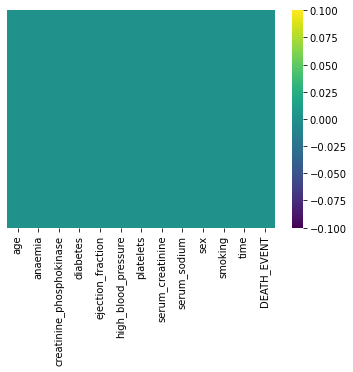

In [6]:
#heatmap to visiualise missing values (if any) in the data set
sns.heatmap(df.isnull(), yticklabels=False, cmap = 'viridis')

Shows that there are no missing values in the data set.

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

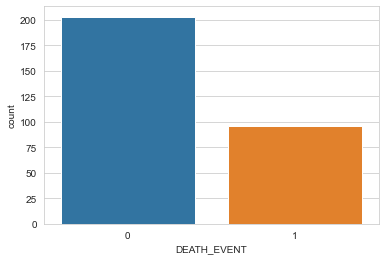

In [7]:
sns.set_style('whitegrid')
sns.countplot(data = df, x = 'DEATH_EVENT')

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

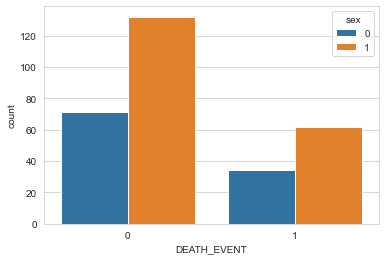

In [8]:
sns.countplot(data = df, x = 'DEATH_EVENT', hue = 'sex')

<AxesSubplot:xlabel='sex', ylabel='count'>

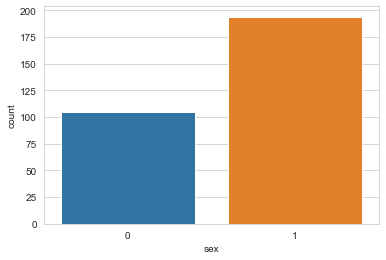

In [9]:
sns.countplot(data = df, x='sex')

People who dies are less than the people who did'nt.
Also, in the people who died majority were males.

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

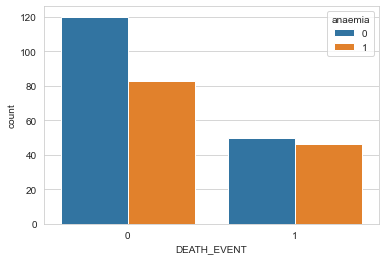

In [10]:
sns.countplot(data = df, x = 'DEATH_EVENT', hue = 'anaemia')

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

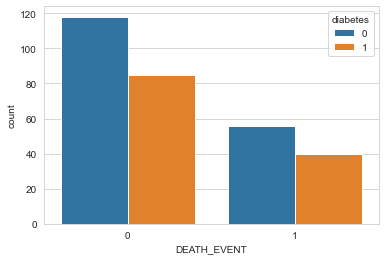

In [11]:
sns.countplot(data = df, x = 'DEATH_EVENT', hue = 'diabetes')

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

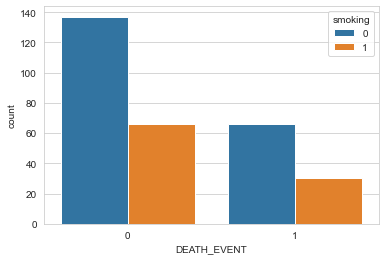

In [12]:
sns.countplot(data = df, x = 'DEATH_EVENT', hue = 'smoking')

C:\Users\swapn\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

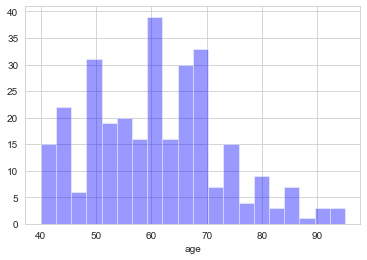

In [13]:
sns.distplot(df['age'], kde = False, color = 'blue', bins = 20)

Gives us a rough distribution of age

In [14]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


<AxesSubplot:>

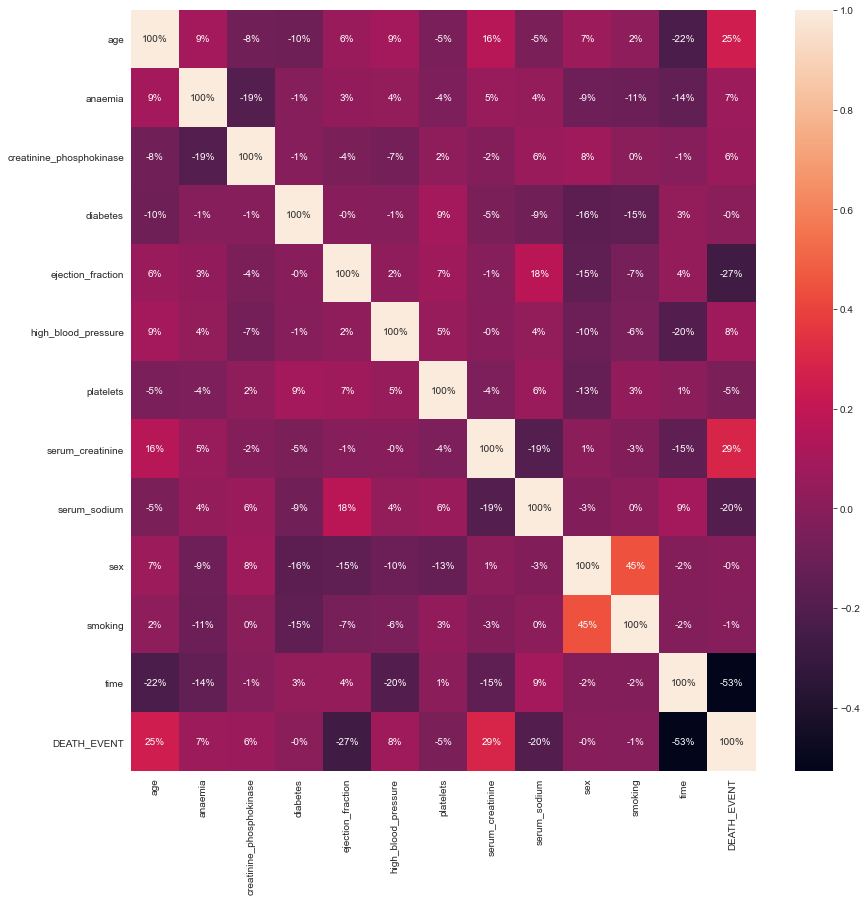

In [15]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot = True, fmt = '.0%')

# PREDICTION MODEL

In [25]:
#Target variable choosen is DEATH_EVENT
#The predcition model will be a classification model
#All the variables are having numerical value so encoding is not required

## ->Train Test Split

In [16]:
#setting our target variable
y = df['DEATH_EVENT']

In [17]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [18]:
#we will be considering all the features for prediction, as the data set is small
X = df.drop(['DEATH_EVENT'], axis = 'columns')

In [19]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [22]:
y_test

193    0
239    0
298    0
217    1
195    1
      ..
276    0
1      1
238    0
25     1
135    0
Name: DEATH_EVENT, Length: 90, dtype: int64

## -> Training and Predicting 

In [23]:
from sklearn.linear_model import LogisticRegression

In [125]:
m1 = LogisticRegression(max_iter = 200, random_state = 2)

In [126]:
m1.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=2)

In [127]:
predictions1 = m1.predict(X_test)

In [128]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [129]:
accuracy = confusion_matrix(y_test, predictions1)

In [130]:
accuracy

array([[53,  4],
       [10, 23]], dtype=int64)

The model correctly classifies 53+23 = 76 entries. Out of 90 entries.

In [131]:
score1 = accuracy_score(y_test, predictions1)
score1

0.8444444444444444

In [132]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
m2 = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', max_depth = 3, random_state = 2)

In [134]:
m2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=200,
                       random_state=2)

In [135]:
predictions2 = m2.predict(X_test)

In [136]:
accuracy2 = confusion_matrix(y_test, predictions1)
accuracy2

array([[53,  4],
       [10, 23]], dtype=int64)

In [137]:
score2 = accuracy_score(y_test, predictions2)
score2

0.8666666666666667

The confusion matrix is identical in both of the cases. The difference between the scores of m1 and m2 is approximately 0.2. Both of them are performing good. m1 has an accuracy of 84.44% while m2 has an accuracy of 86.67%.  

In [138]:
y_test.value_counts()

0    57
1    33
Name: DEATH_EVENT, dtype: int64

In [139]:
#this is basically the % of 1's in the test set, since the data consists of 0's and 1's only.
y_test.mean()

0.36666666666666664

In [140]:
#% of 0's
1-y_test.mean()

0.6333333333333333

form above two %'s we can conclude that a simple model that always predicts 0 everytime will have a score of 63.3%. Comapred to this our model has provided us with much better results.
However that might not be the case everytime we make a model. For that we use confusion matrix to calculate other metrices such as Sensitivity (True Positive Rate or Recall), Specificity (True Negative Rate), Precision, False Positive Rate. These metrices provide us a better picture of the perfromance of the model. 